In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Wczytanie danych
concrete = pd.read_excel("Concrete_Data.xls", comment="#")

In [3]:
concrete

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [4]:
#brak braków danych
concrete.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
#Statystki opisowe
concrete.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
concrete.describe(include='all')

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [7]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
concrete.columns = ['Cement', 'Blast Furnace Slag','Fly Ash', 'Water','Superplasticizer', 'Coarse Aggregate',
                         'Fine Aggregate','Age', 'Concrete compressive strength']

<AxesSubplot:>

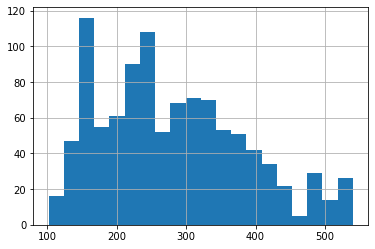

In [9]:
#wykresy
concrete.Cement.hist(bins = 20)

<AxesSubplot:>

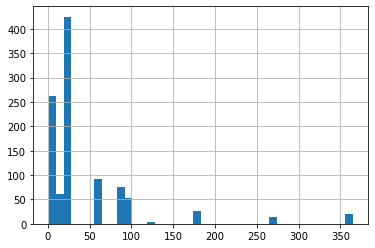

In [10]:
concrete.Age.hist(bins=40)

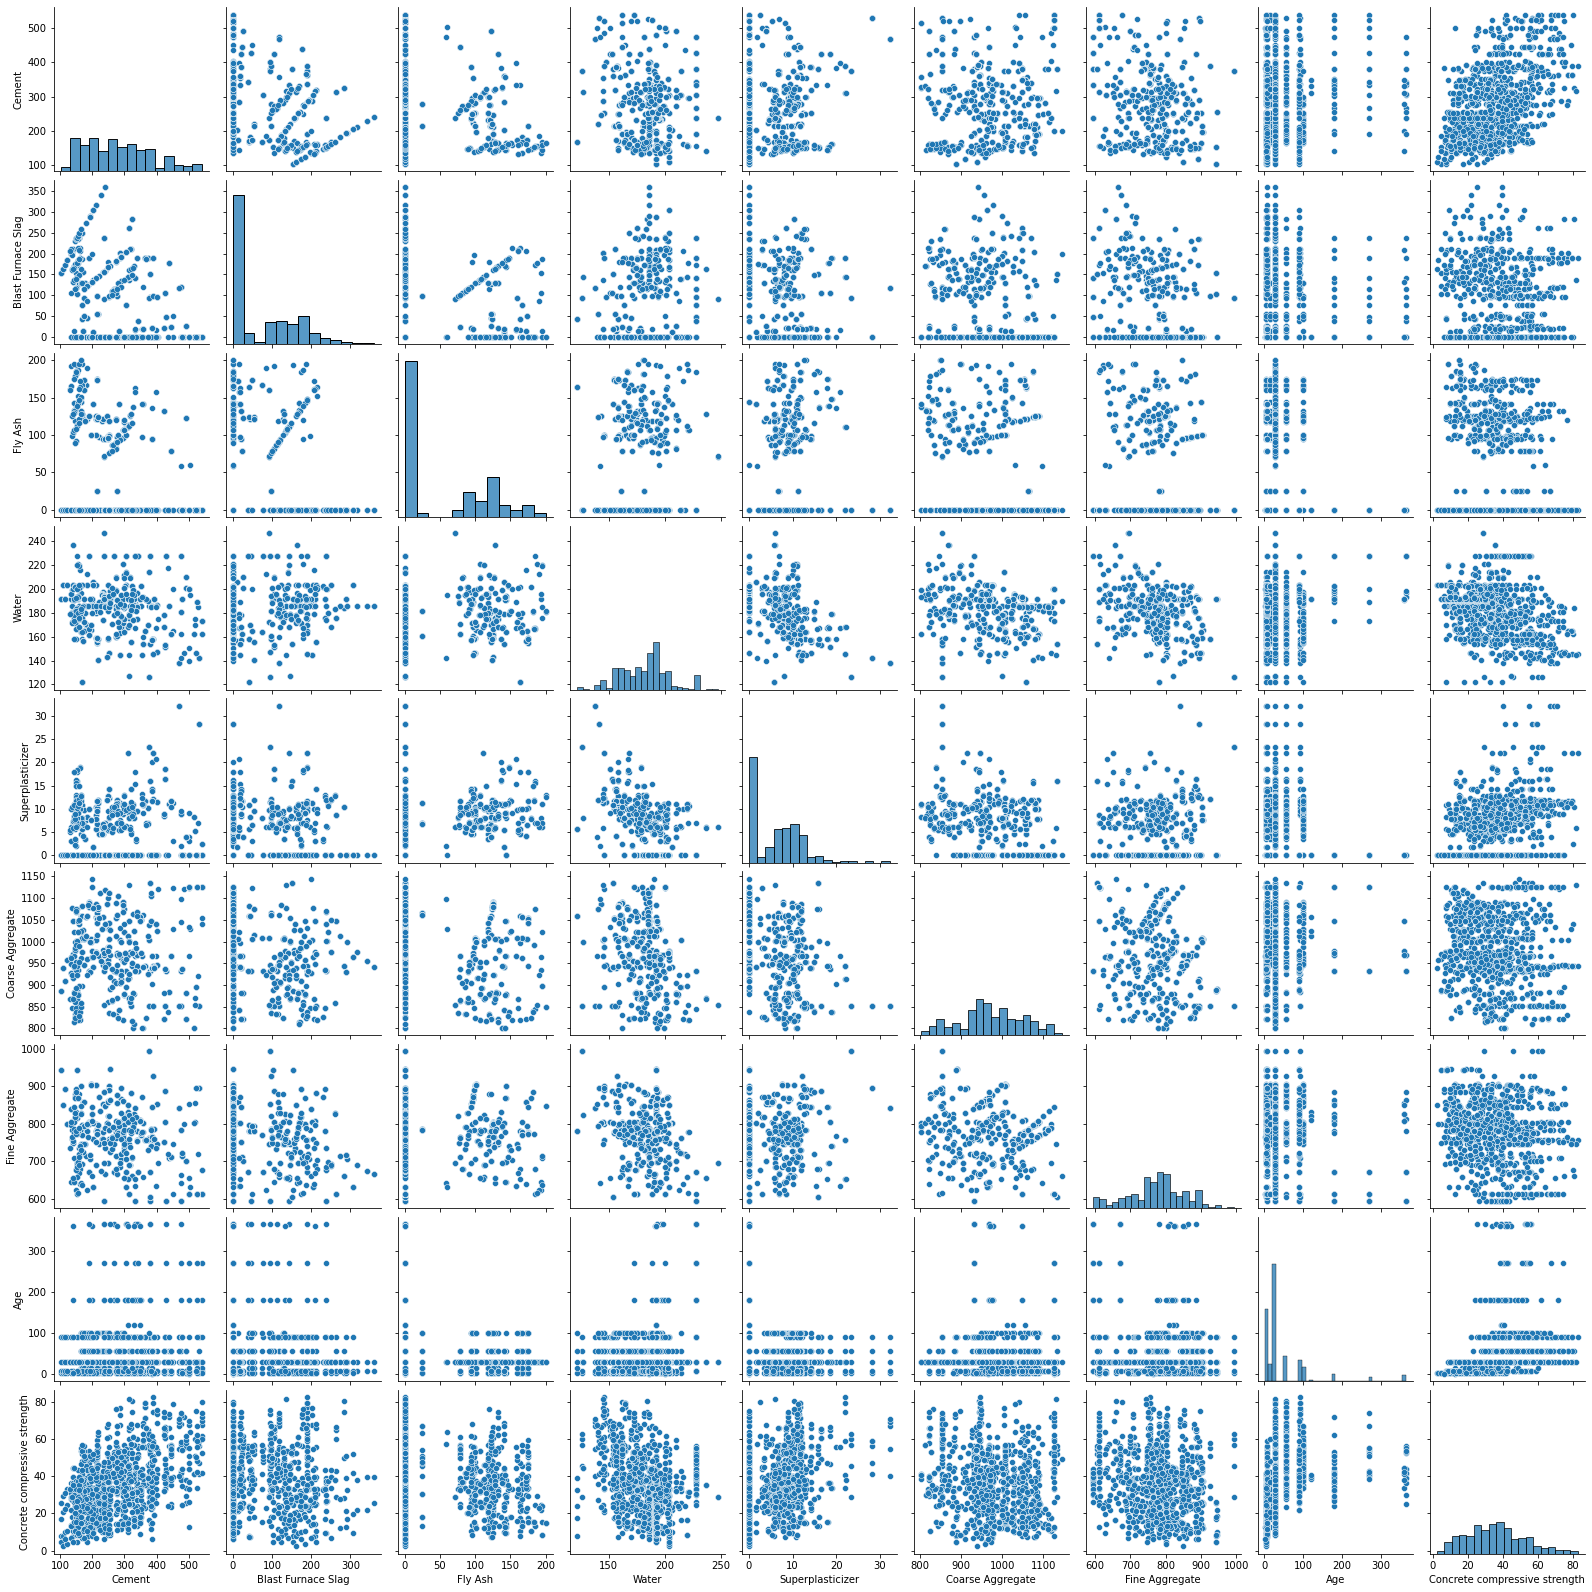

In [183]:
#wykres korelacji
sns.pairplot(concrete)
plt.show()

In [11]:
corr_P = concrete.corr("pearson")
corr_P

Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.275193 -0.397475   
Blast Furnace Slag            -0.275193            1.000000 -0.323569   
Fly Ash                       -0.397475           -0.323569  1.000000   
Water                         -0.081544            0.107286 -0.257044   
Superplasticizer               0.092771            0.043376  0.377340   
Coarse Aggregate              -0.109356           -0.283998 -0.009977   
Fine Aggregate                -0.222720           -0.281593  0.079076   
Age                            0.081947           -0.044246 -0.154370   
Concrete compressive strength  0.497833            0.134824 -0.105753   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.081544          0.092771         -0.109356   
Blast Furnace Slag             0.107286          0.043376         -0.283998   
Fly Ash                       -0.257044          0.377340         -0.009977   
Water                          1.000000         -0.657464         -0.182312   
Superplasticizer              -0.657464          1.000000         -0.266303   
Coarse Aggregate              -0.182312         -0.266303          1.000000   
Fine Aggregate                -0.450635          0.222501         -0.178506   
Age                            0.277604         -0.192717         -0.003016   
Concrete compressive strength -0.289613          0.366102         -0.164928   

                               Fine Aggregate       Age  \
Cement                              -0.222720  0.081947   
Blast Furnace Slag                  -0.281593 -0.044246   
Fly Ash                              0.079076 -0.154370   
Water                               -0.450635  0.277604   
Superplasticizer                     0.222501 -0.192717   
Coarse Aggregate                    -0.178506 -0.003016   
Fine Aggregate                       1.000000 -0.156094   
Age                                 -0.156094  1.000000   
Concrete compressive strength       -0.167249  0.328877   

                               Concrete compressive strength  
Cement                                              0.497833  
Blast Furnace Slag                                  0.134824  
Fly Ash                                            -0.105753  
Water                                              -0.289613  
Superplasticizer                                    0.366102  
Coarse Aggregate                                   -0.164928  
Fine Aggregate                                     -0.167249  
Age                                                 0.328877  
Concrete compressive strength                       1.000000

In [12]:
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()

<ipython-input-12-d8de3a30cd74>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()


In [13]:
abs(corr_P_tri).sort_values(ascending=False)
#Concrete compressive strength is mostly correlated with Cement, Superplasticizer, Age, and Water
#Superplasticizer and Fine Aggregate quantity might be dependant on Water 

Water               Superplasticizer                 0.657464
Cement              Concrete compressive strength    0.497833
Water               Fine Aggregate                   0.450635
Cement              Fly Ash                          0.397475
Fly Ash             Superplasticizer                 0.377340
Superplasticizer    Concrete compressive strength    0.366102
Age                 Concrete compressive strength    0.328877
Blast Furnace Slag  Fly Ash                          0.323569
Water               Concrete compressive strength    0.289613
Blast Furnace Slag  Coarse Aggregate                 0.283998
                    Fine Aggregate                   0.281593
Water               Age                              0.277604
Cement              Blast Furnace Slag               0.275193
Superplasticizer    Coarse Aggregate                 0.266303
Fly Ash             Water                            0.257044
Cement              Fine Aggregate                   0.222720
Superpla

In [14]:
#outliery
import scipy as sc

z_scores = sc.stats.zscore(concrete)
z_scores

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

In [15]:
abs_z_scores = np.abs(z_scores)

In [16]:
filtered_z_scores = (abs_z_scores < 3).all(axis=1)

concrete_clean = concrete[filtered_z_scores]

In [17]:
df = concrete_clean.reset_index(drop=True)
df

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0     540.0                 0.0      0.0  162.0               2.5   
1     540.0                 0.0      0.0  162.0               2.5   
2     266.0               114.0      0.0  228.0               0.0   
3     380.0                95.0      0.0  228.0               0.0   
4     266.0               114.0      0.0  228.0               0.0   
..      ...                 ...      ...    ...               ...   
976   276.4               116.0     90.3  179.6               8.9   
977   322.2                 0.0    115.6  196.0              10.4   
978   148.5               139.4    108.6  192.7               6.1   
979   159.1               186.7      0.0  175.6              11.3   
980   260.9               100.5     78.3  200.6               8.6   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0              1040.0           676.0   28                      79.986111  
1              1055.0           676.0   28                      61.887366  
2               932.0           670.0   90                      47.029847  
3               932.0           594.0   28                      36.447770  
4               932.0           670.0   28                      45.854291  
..                ...             ...  ...                            ...  
976             870.1           768.3   28                      44.284354  
977             817.9           813.4   28                      31.178794  
978             892.4           780.0   28                      23.696601  
979             989.6           788.9   28                      32.768036  
980             864.5           761.5   28                      32.401235  

[981 rows x 9 columns]

In [18]:
concrete_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         981 non-null    float64
 1   Blast Furnace Slag             981 non-null    float64
 2   Fly Ash                        981 non-null    float64
 3   Water                          981 non-null    float64
 4   Superplasticizer               981 non-null    float64
 5   Coarse Aggregate               981 non-null    float64
 6   Fine Aggregate                 981 non-null    float64
 7   Age                            981 non-null    int64  
 8   Concrete compressive strength  981 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 76.6 KB


In [19]:
(1029-981)/1029

0.04664723032069971

In [20]:
#5% observations dropped as outliers
concrete_clean.describe()

Cement  Blast Furnace Slag     Fly Ash       Water  \
count  981.000000          981.000000  981.000000  981.000000   
mean   277.487054           73.105861   56.748471  180.759072   
std    102.595698           85.197537   64.438685   20.141106   
min    102.000000            0.000000    0.000000  121.750000   
25%    190.340000            0.000000    0.000000  164.900000   
50%    266.000000           22.000000    0.000000  184.000000   
75%    349.000000          144.200000  118.310000  192.000000   
max    540.000000          316.100000  200.100000  237.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate         Age  \
count        981.000000        981.000000      981.000000  981.000000   
mean           6.192870        974.728899      776.002294   36.448522   
std            5.486068         77.764866       77.651281   36.871075   
min            0.000000        801.000000      594.000000    1.000000   
25%            0.000000        932.000000      739.000000    7.000000   
50%            6.650000        968.000000      780.000000   28.000000   
75%           10.300000       1038.000000      822.200000   28.000000   
max           23.400000       1145.000000      992.600000  180.000000   

       Concrete compressive strength  
count                     981.000000  
mean                       35.294110  
std                        16.733101  
min                         2.331808  
25%                        23.221552  
50%                        33.687797  
75%                        45.304778  
max                        82.599225

In [21]:
concrete_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         981 non-null    float64
 1   Blast Furnace Slag             981 non-null    float64
 2   Fly Ash                        981 non-null    float64
 3   Water                          981 non-null    float64
 4   Superplasticizer               981 non-null    float64
 5   Coarse Aggregate               981 non-null    float64
 6   Fine Aggregate                 981 non-null    float64
 7   Age                            981 non-null    int64  
 8   Concrete compressive strength  981 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 76.6 KB


In [22]:
import sklearn.linear_model
mnk = sklearn.linear_model.LinearRegression()

In [23]:
concrete_clean

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
5      266.0               114.0      0.0  228.0               0.0   
7      380.0                95.0      0.0  228.0               0.0   
8      266.0               114.0      0.0  228.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               1040.0           676.0   28                      79.986111  
1               1055.0           676.0   28                      61.887366  
5                932.0           670.0   90                      47.029847  
7                932.0           594.0   28                      36.447770  
8                932.0           670.0   28                      45.854291  
...                ...             ...  ...                            ...  
1025             870.1           768.3   28                      44.284354  
1026             817.9           813.4   28                      31.178794  
1027             892.4           780.0   28                      23.696601  
1028             989.6           788.9   28                      32.768036  
1029             864.5           761.5   28                      32.401235  

[981 rows x 9 columns]

In [24]:
X = df.iloc[:, :-1]
X

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0     540.0                 0.0      0.0  162.0               2.5   
1     540.0                 0.0      0.0  162.0               2.5   
2     266.0               114.0      0.0  228.0               0.0   
3     380.0                95.0      0.0  228.0               0.0   
4     266.0               114.0      0.0  228.0               0.0   
..      ...                 ...      ...    ...               ...   
976   276.4               116.0     90.3  179.6               8.9   
977   322.2                 0.0    115.6  196.0              10.4   
978   148.5               139.4    108.6  192.7               6.1   
979   159.1               186.7      0.0  175.6              11.3   
980   260.9               100.5     78.3  200.6               8.6   

     Coarse Aggregate  Fine Aggregate  Age  
0              1040.0           676.0   28  
1              1055.0           676.0   28  
2               932.0           670.0   90  
3               932.0           594.0   28  
4               932.0           670.0   28  
..                ...             ...  ...  
976             870.1           768.3   28  
977             817.9           813.4   28  
978             892.4           780.0   28  
979             989.6           788.9   28  
980             864.5           761.5   28  

[981 rows x 8 columns]

In [25]:
Y = df.iloc[:, -1]
Y

0      79.986111
1      61.887366
2      47.029847
3      36.447770
4      45.854291
         ...    
976    44.284354
977    31.178794
978    23.696601
979    32.768036
980    32.401235
Name: Concrete compressive strength, Length: 981, dtype: float64

In [26]:
mnk.fit(X,Y)

LinearRegression()

In [27]:
#pozwolę sobie podkraść funkcję z metrykami
def fit_regression(model, X_ucz, X_test, y_ucz, y_test):
    #r = sklearn.linear_model.LinearRegression()
    model.fit(X_ucz, y_ucz)
    y_ucz_pred = model.predict(X_ucz)
    y_test_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred)
    }

In [28]:
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X,
                                                                        Y,
                                                                        test_size=0.3,
                                                                        random_state=12345)

In [29]:
df_results_errors = pd.DataFrame()

In [30]:
models = ["Reg. liniowa 70 rs 12345"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz, X_test, y_ucz, y_test)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [31]:
df_results_errors

r_score_u  r_score_t      MSE_u      MSE_t  \
Reg. liniowa 70 rs 12345   0.697965   0.716338  84.943401  77.708478   

                             MAE_u     MAE_t  
Reg. liniowa 70 rs 12345  7.055501  6.611653

In [32]:
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X,
                                                                        Y,
                                                                        test_size=0.3,
                                                                        random_state=123)

In [33]:
models = ["Reg. liniowa 70 rs 123"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz, X_test, y_ucz, y_test)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [34]:
df_results_errors

r_score_u  r_score_t      MSE_u      MSE_t  \
Reg. liniowa 70 rs 12345   0.697965   0.716338  84.943401  77.708478   
Reg. liniowa 70 rs 123     0.712028   0.683489  82.796844  82.640028   

                             MAE_u     MAE_t  
Reg. liniowa 70 rs 12345  7.055501  6.611653  
Reg. liniowa 70 rs 123    6.924884  6.903431

In [35]:
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X,
                                                                        Y,
                                                                        test_size=0.1,
                                                                        random_state=123)

In [36]:
models = ["Reg. liniowa 90"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz, X_test, y_ucz, y_test)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [37]:
#standaryzowanie zmiennych
X_std = (X-X.mean(axis=0))/X.std(axis=0)
Y_std = (Y-Y.mean())/Y.std()

In [41]:
mnk_std = sklearn.linear_model.LinearRegression()
mnk_std.fit(X_std, Y_std)

LinearRegression()

In [42]:
pd.Series(np.abs(mnk_std.coef_), index=X.columns.to_list()).round(4).sort_values(ascending=False)

Cement                0.7166
Blast Furnace Slag    0.5052
Age                   0.4872
Fly Ash               0.2899
Water                 0.2114
Superplasticizer      0.1090
Fine Aggregate        0.0537
Coarse Aggregate      0.0462
dtype: float64

In [43]:
X_ucz_std, X_test_std, y_ucz_std, y_test_std = sklearn.model_selection.train_test_split(X_std,
                                                                        Y_std,
                                                                        test_size=0.3,
                                                                        random_state=123)

In [44]:
models = ["Reg. liniowa std"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz_std, X_test_std, y_ucz_std, y_test_std)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [45]:
X_norm = (X-X.min())/(X.max()-X.min())
Y_norm = (Y-Y.min())/(Y.max()-Y.min())

In [46]:
X_ucz_norm, X_test_norm, y_ucz_norm, y_test_norm = sklearn.model_selection.train_test_split(X_norm,
                                                                        Y_norm,
                                                                        test_size=0.3,
                                                                        random_state=123)

In [47]:
models = ["Reg. liniowa norm"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz_norm, X_test_norm, y_ucz_norm, y_test_norm)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [48]:
df_results_errors

r_score_u  r_score_t      MSE_u      MSE_t  \
Reg. liniowa 70 rs 12345   0.697965   0.716338  84.943401  77.708478   
Reg. liniowa 70 rs 123     0.712028   0.683489  82.796844  82.640028   
Reg. liniowa 90            0.698168   0.765790  84.218208  66.934883   
Reg. liniowa std           0.712028   0.683489   0.295707   0.295146   
Reg. liniowa norm          0.712028   0.683489   0.012851   0.012827   

                             MAE_u     MAE_t  
Reg. liniowa 70 rs 12345  7.055501  6.611653  
Reg. liniowa 70 rs 123    6.924884  6.903431  
Reg. liniowa 90           6.972352  6.357466  
Reg. liniowa std          0.413843  0.412561  
Reg. liniowa norm         0.086273  0.086005

In [49]:
X_wout_coarse_agg = X.drop(columns='Coarse Aggregate').copy()

In [50]:
X_ucz_wout_coarse_agg, X_test_wout_coarse_agg, y_ucz_wout_coarse_agg, y_test_wout_coarse_agg = sklearn.model_selection.train_test_split(X_wout_coarse_agg,
                                                                        Y,
                                                                        test_size=0.3,
                                                                        random_state=123)

In [51]:
models = ["Reg. liniowa wout Coarse Aggregate"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz_wout_coarse_agg, X_test_wout_coarse_agg, y_ucz_wout_coarse_agg, y_test_wout_coarse_agg)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [52]:
df_results_errors

r_score_u  r_score_t      MSE_u  \
Reg. liniowa 70 rs 12345             0.697965   0.716338  84.943401   
Reg. liniowa 70 rs 123               0.712028   0.683489  82.796844   
Reg. liniowa 90                      0.698168   0.765790  84.218208   
Reg. liniowa std                     0.712028   0.683489   0.295707   
Reg. liniowa norm                    0.712028   0.683489   0.012851   
Reg. liniowa wout Coarse Aggregate   0.711373   0.684066  82.985138   

                                        MSE_t     MAE_u     MAE_t  
Reg. liniowa 70 rs 12345            77.708478  7.055501  6.611653  
Reg. liniowa 70 rs 123              82.640028  6.924884  6.903431  
Reg. liniowa 90                     66.934883  6.972352  6.357466  
Reg. liniowa std                     0.295146  0.413843  0.412561  
Reg. liniowa norm                    0.012827  0.086273  0.086005  
Reg. liniowa wout Coarse Aggregate  82.489577  6.939355  6.940377

In [53]:
X_wout_spl = X.drop(columns='Superplasticizer').copy()

In [54]:
X_ucz_wout_spl, X_test_wout_spl, y_ucz_wout_spl, y_test_wout_spl = sklearn.model_selection.train_test_split(X_wout_spl,
                                                                        Y,
                                                                        test_size=0.3,
                                                                        random_state=123)

In [55]:
models = ["Reg. liniowa wout Superplasticizer"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X_ucz_wout_spl, X_test_wout_spl, y_ucz_wout_spl, y_test_wout_spl)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [56]:
df_results_errors

r_score_u  r_score_t      MSE_u  \
Reg. liniowa 70 rs 12345             0.697965   0.716338  84.943401   
Reg. liniowa 70 rs 123               0.712028   0.683489  82.796844   
Reg. liniowa 90                      0.698168   0.765790  84.218208   
Reg. liniowa std                     0.712028   0.683489   0.295707   
Reg. liniowa norm                    0.712028   0.683489   0.012851   
Reg. liniowa wout Coarse Aggregate   0.711373   0.684066  82.985138   
Reg. liniowa wout Superplasticizer   0.706778   0.683384  84.306261   

                                        MSE_t     MAE_u     MAE_t  
Reg. liniowa 70 rs 12345            77.708478  7.055501  6.611653  
Reg. liniowa 70 rs 123              82.640028  6.924884  6.903431  
Reg. liniowa 90                     66.934883  6.972352  6.357466  
Reg. liniowa std                     0.295146  0.413843  0.412561  
Reg. liniowa norm                    0.012827  0.086273  0.086005  
Reg. liniowa wout Coarse Aggregate  82.489577  6.939355  6.940377  
Reg. liniowa wout Superplasticizer  82.667662  6.987620  6.950910

In [57]:
import sklearn.preprocessing

In [58]:
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz = wielomian2.fit_transform(X_ucz)
X2_test = wielomian2.fit_transform(X_test)

In [59]:
models = ["Reg. liniowa poly f"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz, X2_test, y_ucz, y_test)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [60]:
df_results_errors

r_score_u  r_score_t      MSE_u  \
Reg. liniowa 70 rs 12345             0.697965   0.716338  84.943401   
Reg. liniowa 70 rs 123               0.712028   0.683489  82.796844   
Reg. liniowa 90                      0.698168   0.765790  84.218208   
Reg. liniowa std                     0.712028   0.683489   0.295707   
Reg. liniowa norm                    0.712028   0.683489   0.012851   
Reg. liniowa wout Coarse Aggregate   0.711373   0.684066  82.985138   
Reg. liniowa wout Superplasticizer   0.706778   0.683384  84.306261   
Reg. liniowa poly f                  0.844830   0.905464  43.296222   

                                        MSE_t     MAE_u     MAE_t  
Reg. liniowa 70 rs 12345            77.708478  7.055501  6.611653  
Reg. liniowa 70 rs 123              82.640028  6.924884  6.903431  
Reg. liniowa 90                     66.934883  6.972352  6.357466  
Reg. liniowa std                     0.295146  0.413843  0.412561  
Reg. liniowa norm                    0.012827  0.086273  0.086005  
Reg. liniowa wout Coarse Aggregate  82.489577  6.939355  6.940377  
Reg. liniowa wout Superplasticizer  82.667662  6.987620  6.950910  
Reg. liniowa poly f                 27.017537  5.023825  4.019811

In [61]:
def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)

In [62]:
def forward_selection(X, y):
    n, m = X.shape
    best_idx = []
    best_free = set(range(m))
    best_fit = np.inf
    res = []
    
    for i in range(0, m):
        cur_idx = -1
        cur_fit = np.inf
        for e in best_free:
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e]
            r.fit(X[:, test_idx], y)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
    return res

In [63]:
wybrane_df = pd.DataFrame(forward_selection(X2_ucz, y_ucz), columns=["zmienna", "BIC"])
wybrane_zmienne = wybrane_df["zmienna"].tolist()
wybrane_df["nazwa"] = [X.columns[w>=1].append(X.columns[w==2]).str.cat(sep="*") for w in wielomian2.powers_[wybrane_zmienne]]
wybrane_df

zmienna          BIC                              nazwa
0        37  4665.766035               Superplasticizer*Age
1         8  4326.255867                      Cement*Cement
2        22  4126.169927             Blast Furnace Slag*Age
3        32  4082.364703               Water*Fine Aggregate
4        42  4010.807934                 Fine Aggregate*Age
5        43  3857.162678                            Age*Age
6         9  3776.727370          Cement*Blast Furnace Slag
7        10  3719.603576                     Cement*Fly Ash
8        15  3696.958653                         Cement*Age
9        31  3671.241542             Water*Coarse Aggregate
10       40  3644.049040               Coarse Aggregate*Age
11       13  3624.734357            Cement*Coarse Aggregate
12       17  3616.380795         Blast Furnace Slag*Fly Ash
13       34  3613.098751  Superplasticizer*Superplasticizer
14       35  3585.654897  Superplasticizer*Coarse Aggregate
15       21  3579.399398  Blast Furnace Slag*Fine Aggregate
16        7  3572.151290                                Age

In [64]:
models = ["Reg. liniowa new predictors"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz[:, wybrane_zmienne], X2_test[:, wybrane_zmienne], y_ucz, y_test)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [65]:
df_results_errors

r_score_u  r_score_t      MSE_u  \
Reg. liniowa 70 rs 12345             0.697965   0.716338  84.943401   
Reg. liniowa 70 rs 123               0.712028   0.683489  82.796844   
Reg. liniowa 90                      0.698168   0.765790  84.218208   
Reg. liniowa std                     0.712028   0.683489   0.295707   
Reg. liniowa norm                    0.712028   0.683489   0.012851   
Reg. liniowa wout Coarse Aggregate   0.711373   0.684066  82.985138   
Reg. liniowa wout Superplasticizer   0.706778   0.683384  84.306261   
Reg. liniowa poly f                  0.844830   0.905464  43.296222   
Reg. liniowa new predictors          0.820871   0.879765  49.981157   

                                        MSE_t     MAE_u     MAE_t  
Reg. liniowa 70 rs 12345            77.708478  7.055501  6.611653  
Reg. liniowa 70 rs 123              82.640028  6.924884  6.903431  
Reg. liniowa 90                     66.934883  6.972352  6.357466  
Reg. liniowa std                     0.295146  0.413843  0.412561  
Reg. liniowa norm                    0.012827  0.086273  0.086005  
Reg. liniowa wout Coarse Aggregate  82.489577  6.939355  6.940377  
Reg. liniowa wout Superplasticizer  82.667662  6.987620  6.950910  
Reg. liniowa poly f                 27.017537  5.023825  4.019811  
Reg. liniowa new predictors         34.362047  5.403279  4.482155

In [66]:
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz_std = wielomian2.fit_transform(X_ucz_std)
X2_test_std = wielomian2.fit_transform(X_test_std)

In [67]:
models = ["Reg. liniowa poly f std"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz_std, X2_test_std, y_ucz_std, y_test_std)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [68]:
df_results_errors

r_score_u  r_score_t      MSE_u  \
Reg. liniowa 70 rs 12345             0.697965   0.716338  84.943401   
Reg. liniowa 70 rs 123               0.712028   0.683489  82.796844   
Reg. liniowa 90                      0.698168   0.765790  84.218208   
Reg. liniowa std                     0.712028   0.683489   0.295707   
Reg. liniowa norm                    0.712028   0.683489   0.012851   
Reg. liniowa wout Coarse Aggregate   0.711373   0.684066  82.985138   
Reg. liniowa wout Superplasticizer   0.706778   0.683384  84.306261   
Reg. liniowa poly f                  0.844830   0.905464  43.296222   
Reg. liniowa new predictors          0.820871   0.879765  49.981157   
Reg. liniowa poly f std              0.857707   0.822003   0.146115   

                                        MSE_t     MAE_u     MAE_t  
Reg. liniowa 70 rs 12345            77.708478  7.055501  6.611653  
Reg. liniowa 70 rs 123              82.640028  6.924884  6.903431  
Reg. liniowa 90                     66.934883  6.972352  6.357466  
Reg. liniowa std                     0.295146  0.413843  0.412561  
Reg. liniowa norm                    0.012827  0.086273  0.086005  
Reg. liniowa wout Coarse Aggregate  82.489577  6.939355  6.940377  
Reg. liniowa wout Superplasticizer  82.667662  6.987620  6.950910  
Reg. liniowa poly f                 27.017537  5.023825  4.019811  
Reg. liniowa new predictors         34.362047  5.403279  4.482155  
Reg. liniowa poly f std              0.165983  0.295151  0.299270

In [69]:
wybrane_df = pd.DataFrame(forward_selection(X2_ucz_std, y_ucz_std), columns=["zmienna", "BIC"])
wybrane_zmienne = wybrane_df["zmienna"].tolist()
wybrane_df["nazwa"] = [X.columns[w>=1].append(X.columns[w==2]).str.cat(sep="*") for w in wielomian2.powers_[wybrane_zmienne]]
wybrane_df

zmienna          BIC                                  nazwa
0         0  -150.401838                                 Cement
1         7  -330.796178                                    Age
2        43  -577.461662                                Age*Age
3         4  -773.968194                       Superplasticizer
4         1  -971.272069                     Blast Furnace Slag
5         3 -1027.656185                                  Water
6        34 -1093.779716      Superplasticizer*Superplasticizer
7        31 -1110.363398                 Water*Coarse Aggregate
8         2 -1119.744944                                Fly Ash
9        16 -1123.546709  Blast Furnace Slag*Blast Furnace Slag
10       20 -1125.515476    Blast Furnace Slag*Coarse Aggregate
11       22 -1126.976280                 Blast Furnace Slag*Age

In [71]:
models = ["Reg. liniowa poly f std new predictors"]
res = [fit_regression(sklearn.linear_model.LinearRegression(),
                      X2_ucz_std[:, wybrane_zmienne], X2_test_std[:, wybrane_zmienne], y_ucz_std, y_test_std)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=models))

In [72]:
df_results_errors

r_score_u  r_score_t      MSE_u  \
Reg. liniowa 70 rs 12345                 0.697965   0.716338  84.943401   
Reg. liniowa 70 rs 123                   0.712028   0.683489  82.796844   
Reg. liniowa 90                          0.698168   0.765790  84.218208   
Reg. liniowa std                         0.712028   0.683489   0.295707   
Reg. liniowa norm                        0.712028   0.683489   0.012851   
Reg. liniowa wout Coarse Aggregate       0.711373   0.684066  82.985138   
Reg. liniowa wout Superplasticizer       0.706778   0.683384  84.306261   
Reg. liniowa poly f                      0.844830   0.905464  43.296222   
Reg. liniowa new predictors              0.820871   0.879765  49.981157   
Reg. liniowa poly f std                  0.857707   0.822003   0.146115   
Reg. liniowa poly f std new predictors   0.833555   0.808792   0.170916   

                                            MSE_t     MAE_u     MAE_t  
Reg. liniowa 70 rs 12345                77.708478  7.055501  6.611653  
Reg. liniowa 70 rs 123                  82.640028  6.924884  6.903431  
Reg. liniowa 90                         66.934883  6.972352  6.357466  
Reg. liniowa std                         0.295146  0.413843  0.412561  
Reg. liniowa norm                        0.012827  0.086273  0.086005  
Reg. liniowa wout Coarse Aggregate      82.489577  6.939355  6.940377  
Reg. liniowa wout Superplasticizer      82.667662  6.987620  6.950910  
Reg. liniowa poly f                     27.017537  5.023825  4.019811  
Reg. liniowa new predictors             34.362047  5.403279  4.482155  
Reg. liniowa poly f std                  0.165983  0.295151  0.299270  
Reg. liniowa poly f std new predictors   0.178302  0.316795  0.318398